# 프로젝트 : 트랜스포머로 만드는 대화형 챗봇
**심심이가 유료화돼서 직접 만드는 심심이**

## 1. 데이터 준비하기
- **데이터 불러오기**
- **데이터 전처리**
- **문장 토큰화하기**

## 2. 모델 설계하기

## 3. 모델 학습하기

## 4. 모델 학습 결과

- - -
### 데이터 준비하기
- **데이터 불러오기**

In [ ]:
import os
import pandas as pd
import tensorflow as tf

data_path = os.getenv('HOME') + '/aiffel/transformer_chatbot/data/ChatbotData .csv'
data = pd.read_csv(data_path, encoding='UTF-8')

data

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


한국어 챗봇 데이터는 송영숙님이 공개한 챗봇 데이터를 사용합니다.

데이터는 [여기](https://github.com/songys/Chatbot_data/blob/master/ChatbotData.csv)에서 다운로드할 수 있습니다.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       11823 non-null  object
 1   A       11823 non-null  object
 2   label   11823 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 277.2+ KB


`Q`는 질문, `A`는 문답, `label`은 레이블입니다.

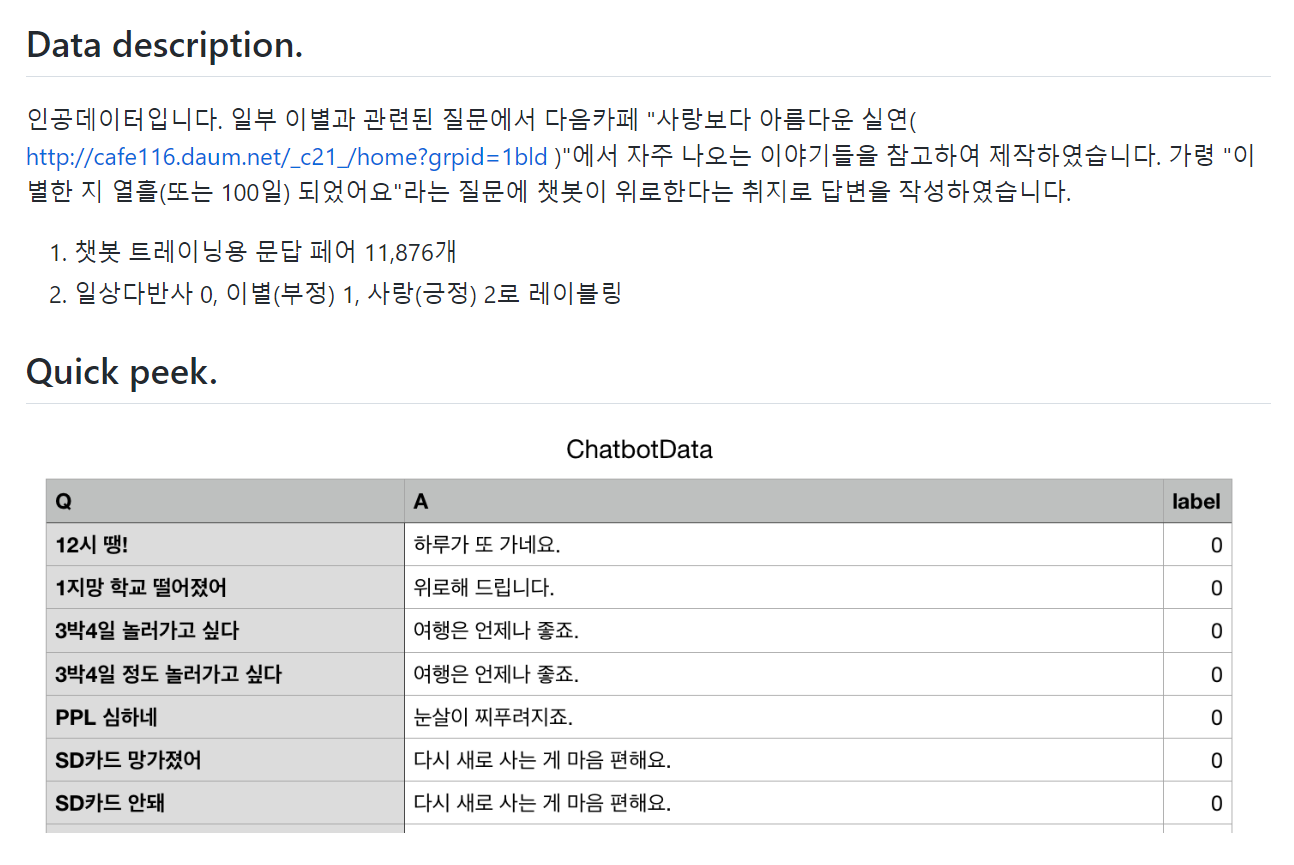

레이블이 왜 2까지 있는건지 확인해보니 각각의 레이블은

    0 : 일상
    1 : 이별(부정)
    2 : 사랑(긍정)
으로 대화의 주제를 뜻합니다.

- - -
### 데이터 준비하기
- **데이터 전처리**

In [ ]:
import re

regex = lambda x: re.sub(r"[^a-zA-Z0-9\uAC00-\uD7A3\s~!?,.']+", '', x) # a-z : 모든 알파벳 소문자
                                                                        # A-Z : 모든 알파벳 대문자
                                                                        # 0-9 : 모든 숫자
                                                                        # \uAC00-\uD7A3 : 모든 한글
                                                                        # \s : 공백
                                                                        # ~!?,.' : 예외시킨 특수문자들

data['Q'] = data['Q'].apply(regex)
data['A'] = data['A'].apply(regex)

data

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


가장 먼저 문장의 특수문자를 정규표현식으로 제거했습니다.

특수문자만 제거할 수 있도록 모든 특수문자만 모아놓은 라이브러리가 있다고는 배웠는데 찾아봐도 보이질 않네요.

그래서 결국 알파벳, 한글, 공백, 예외 특수문자가 아니면 제거한다는 식으로 복잡하게 처리했습니다.

In [ ]:
from konlpy.tag import Okt

data['Q'] = data['Q'].apply(Okt().morphs)
data['A'] = data['A'].apply(Okt().morphs)

data

,Q,A,label
0,"[12시, 땡, !]","[하루, 가, 또, 가네요, .]",0
1,"[1, 지망, 학교, 떨어졌어]","[위로, 해, 드립니다, .]",0
2,"[3, 박, 4일, 놀러, 가고, 싶다]","[여행, 은, 언제나, 좋죠, .]",0
3,"[3, 박, 4일, 정도, 놀러, 가고, 싶다]","[여행, 은, 언제나, 좋죠, .]",0
4,"[PPL, 심하네]","[눈살, 이, 찌푸려지죠, .]",0
...,...,...,...
11818,"[훔쳐, 보는, 것, 도, 눈치, 보임, .]","[티, 가, 나, 니까, 눈치, 가, 보이는, 거, 죠, !]",2
11819,"[훔쳐, 보는, 것, 도, 눈치, 보임, .]","[훔쳐, 보는, 거, 티나, 나, 봐요, .]",2
11820,"[흑기사, 해주는, 짝남, .]","[설렜겠어요, .]",2
11821,"[힘든, 연애, 좋은, 연애, 라는, 게, 무슨, 차이, 일까, ?]","[잘, 헤어질, 수, 있는, 사이, 여부, 인, 거, 같아요, .]",2


그리고 프로젝트8에서 써봤던 `KoNLPy` 모듈을 사용해서 형태소와 구두점을 분리해줬습니다.

In [ ]:
questions_max_len = max([len(i) for i in data['Q']])
answers_max_len = max([len(i) for i in data['A']])

print('질문 데이터의 문장 최대 길이 : {}'.format(questions_max_len))
print('답변 데이터의 문장 최대 길이 : {}'.format(answers_max_len))

질문 데이터의 문장 최대 길이 : 21
답변 데이터의 문장 최대 길이 : 31


분리 결과 가장 길이가 긴 문장은 길이가 31입니다.

In [ ]:
data['Q'] = data['Q'].apply(lambda x: ' '.join(x))
data['A'] = data['A'].apply(lambda x: ' '.join(x))

data

,Q,A,label
0,12시 땡 !,하루 가 또 가네요 .,0
1,1 지망 학교 떨어졌어,위로 해 드립니다 .,0
2,3 박 4일 놀러 가고 싶다,여행 은 언제나 좋죠 .,0
3,3 박 4일 정도 놀러 가고 싶다,여행 은 언제나 좋죠 .,0
4,PPL 심하네,눈살 이 찌푸려지죠 .,0
...,...,...,...
11818,훔쳐 보는 것 도 눈치 보임 .,티 가 나 니까 눈치 가 보이는 거 죠 !,2
11819,훔쳐 보는 것 도 눈치 보임 .,훔쳐 보는 거 티나 나 봐요 .,2
11820,흑기사 해주는 짝남 .,설렜겠어요 .,2
11821,힘든 연애 좋은 연애 라는 게 무슨 차이 일까 ?,잘 헤어질 수 있는 사이 여부 인 거 같아요 .,2


불용어 제거는 <u>'나**의** 햄버거'</u> 와 <u>'나**는** 햄버거'</u> 처럼 조사에 따라 의미가 조금씩 달라지거나, 과거형과 현재형에서도 의미가 아주 조금씩 달라지는 것 처럼

감정분석과 같은 경우에는 불용어 제거가 도움되겠지만 문장의 정확한 의도를 파악하기 위해서는 불용어도 필요하다고 판단해 제거하지 않았습니다.

`KoLNPy`에서 불용어 제거가 함께 처리되는 라이브러리를 사용하면 불용어를 간단하게 제거할 수도 있습니다.

In [ ]:
data[data['Q'].duplicated()]

,Q,A,label
196,고양이 키우고 싶어,가족 들 과 상의 해보세요 .,0
235,공시 준비 힘들어,잘 될 거 예요 .,0
989,넘어질 뻔했어,조심하세요 .,0
1294,돈 벌고 싶어,많이 벌수록 좋아요 .,0
1445,로또 번호 알려줘,알 면 제 가 하죠 .,0
...,...,...,...
11642,착해서 잘해주는 건지 좋아하는 건지,헷갈린다고 말 해보세요 .,2
11649,첫 눈 에 반하는게 가능해 ?,당연히 가능하죠 .,2
11658,첫사랑 생각나,지금 의 사랑 에 충실하세요 .,2
11732,커플 여행 이 나을까 그냥 우리 끼리 갈까 ?,저 는 둘 이 가는 게 좋아요 .,2


In [ ]:
data.drop_duplicates(['Q'], inplace=True)

data[data['Q'].duplicated()]

,Q,A,label


전처리를 마치고 중복되는 질문을 제거했습니다.

질문에 대한 중복만 제거하는 이유는 대답이 같을 수는 있어도 질문이 같으면 당황스럽잖아요?

In [ ]:
questions, answers = data['Q'], data['A']

그리고 `label`은 쓰지 않고 질문과 문답만 사용하겠습니다.

- - -
### 데이터 준비하기
- **문장 토큰화하기**

In [ ]:
import tensorflow_datasets as tfds

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**15)

예제에서 등장한 `SubwordTextEncoder`를 사용해 단어장을 만들어줬습니다.

한국어에 대해 어떤 흐름으로 동작하는 지는 모르겠습니다.

    target_vocab_size를 왜 2의 제곱으로 주는 지도..

In [ ]:
START_TOKEN, END_TOKEN, VOCAB_SIZE = [tokenizer.vocab_size], [tokenizer.vocab_size + 1], tokenizer.vocab_size + 2

print('START_TOKEN의 번호 :', START_TOKEN)
print('END_TOKEN의 번호 :', END_TOKEN)

START_TOKEN의 번호 : [18461]
END_TOKEN의 번호 : [18462]


시작 토큰과 종료 토큰으로 단어장의 마지막 숫자를 부여합니다.

단어장의 크기는 상수로 사용하지만 토큰들은 정수화된 문장의 앞뒤에 추가되기 때문에 단일 리스트에 담아줍니다.

In [ ]:
print('21번째 질문 : {}'.format(questions[21]))
print('21번째 문답 : {}'.format(answers[21]))
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21])))

21번째 질문 : 가스 비 장난 아님
21번째 문답 : 다음 달 에는 더 절약 해봐요 .
정수 인코딩 후의 21번째 질문 샘플: [2446, 315, 671, 5429]
정수 인코딩 후의 21번째 답변 샘플: [875, 167, 132, 33, 1470, 270, 1]


`tokenizer.encode`를 사용하면 정수화된 문장을 볼 수 있습니다.

In [ ]:
questions = questions.apply(lambda x: START_TOKEN + tokenizer.encode(x) + END_TOKEN)
answers = answers.apply(lambda x: START_TOKEN + tokenizer.encode(x) + END_TOKEN)

데이터셋을 정수화함과 동시에 시작 토큰과 종료 토큰을 추가해줍니다.

In [ ]:
MAX_LENGTH = 33

questions = tf.keras.preprocessing.sequence.pad_sequences(questions, maxlen=MAX_LENGTH, padding='post')
answers = tf.keras.preprocessing.sequence.pad_sequences(answers, maxlen=MAX_LENGTH, padding='post')

최대 길이가 31이였으니 시작 토큰과 종료 토큰이 추가된 것을 감안해 최대 길이를 33으로 지정했습니다.

그러면 길이가 33 이하인 문장은 모든 문장이 해당되며 제거할 데이터가 없어집니다.

전처리 과정이 귀찮았던 것이 아니라 데이터셋이 약 11000개로 충분하지 않아 최대한 많고 다양한 데이터를 학습할수록 결과가 좋을 것 같아서입니다.

    33 자체가 큰 수도 아닐 뿐더러 어차피 마스킹을 쓰니까 패딩이 길어져도 괜찮을 것 같기도 하고?

In [ ]:
print('단어장의 크기 :', (VOCAB_SIZE))
print('질문 샘플 개수: {}'.format(len(questions)))
print('답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 18463
질문 샘플 개수: 11644
답변 샘플 개수: 11644


2의 15제곱으로 약 32000개를 제한으로 걸었지만 단어장의 크기가 18000개인 것을 보면 사용된 모든 단어가 포함된 것으로 보입니다.

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

질문과 문답을 인코더 인풋과 디코더 인풋, 디코더 아웃풋으로 나눠줍니다.

- - -
### 모델 설계하기

#### *어텐션*

In [ ]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        # 각도 배열 생성
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model
        )

        # 배열의 짝수 인덱스에는 sin 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
        # 배열의 홀수 인덱스에는 cosine 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        # sin과 cosine이 교차되도록 재배열
        pos_encoding = tf.stack([sines, cosines], axis=0)
        pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])

        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

In [ ]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
    # 어텐션 가중치는 Q와 K의 닷 프로덕트
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # 가중치를 정규화
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # 패딩에 마스크 추가
    if mask is not None:
        logits += (mask * -1e9)

    # softmax적용
    attention_weights = tf.nn.softmax(logits, axis=-1)

    # 최종 어텐션은 가중치와 V의 닷 프로덕트
    output = tf.matmul(attention_weights, value)
    return output

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)

    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # Q, K, V에 각각 Dense를 적용합니다
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # 병렬 연산을 위한 머리를 여러 개 만듭니다
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # 스케일드 닷 프로덕트 어텐션 함수
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
        concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

        # 최종 결과에도 Dense를 한 번 더 적용합니다
        outputs = self.dense(concat_attention)

        return outputs

In [ ]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    return mask[:, tf.newaxis, tf.newaxis, :]

def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)

#### *인코더*

In [ ]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

   # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention = MultiHeadAttention(
        d_model, num_heads, name="attention")({
            'query': inputs,
            'key': inputs,
            'value': inputs,
            'mask': padding_mask
        })

    # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(inputs + attention)

    # 두 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [ ]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # num_layers만큼 쌓아올린 인코더의 층.
    for i in range(num_layers):
        outputs = encoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="encoder_layer_{}".format(i),
        )([outputs, padding_mask])

    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

#### *디코더*

In [ ]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
            'query': inputs,
            'key': inputs,
            'value': inputs,
            'mask': look_ahead_mask
        })

    # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention1 + inputs)

    # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
    attention2 = MultiHeadAttention(
        d_model, num_heads, name="attention_2")(inputs={
            'query': attention1,
            'key': enc_outputs,
            'value': enc_outputs,
            'mask': padding_mask
        })

    # 마스크드 멀티 헤드 어텐션의 결과는
    # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention2 + attention1)

    # 세 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

In [ ]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name='look_ahead_mask')

    # 패딩 마스크
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    # Dropout이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        outputs = decoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

#### *트랜스포머*

In [ ]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

    # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
    # 내부적으로 패딩 마스크도 포함되어져 있습니다.
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask,
        output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
    # 디코더에서 패딩을 위한 마스크
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    # 인코더
    enc_outputs = encoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[inputs, enc_padding_mask])

    # 디코더
    dec_outputs = decoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 완전연결층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [ ]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.2 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    5780736     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

~~너무 어려워요~~

- - -
### 모델 학습하기

In [ ]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [ ]:
history = model.fit(dataset, epochs=20, verbose=1)

Epoch 1/20
182/182 [==============================] - 21s 71ms/step - loss: 2.2170 - accuracy: 0.0282
Epoch 2/20
182/182 [==============================] - 13s 71ms/step - loss: 1.7033 - accuracy: 0.0591
Epoch 3/20
182/182 [==============================] - 13s 71ms/step - loss: 1.3431 - accuracy: 0.0621
Epoch 4/20
182/182 [==============================] - 13s 74ms/step - loss: 1.2048 - accuracy: 0.0700
Epoch 5/20
182/182 [==============================] - 13s 72ms/step - loss: 1.1054 - accuracy: 0.0785
Epoch 6/20
182/182 [==============================] - 13s 71ms/step - loss: 1.0165 - accuracy: 0.0860
Epoch 7/20
182/182 [==============================] - 13s 71ms/step - loss: 0.9409 - accuracy: 0.0925
Epoch 8/20
182/182 [==============================] - 13s 71ms/step - loss: 0.8715 - accuracy: 0.0988
Epoch 9/20
182/182 [==============================] - 13s 71ms/step - loss: 0.8038 - accuracy: 0.1051
Epoch 10/20
182/182 [==============================] - 13s 72ms/step - loss: 0.737

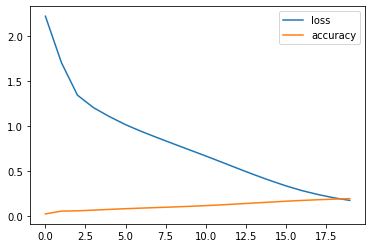

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

아무리 학습을 해도 정확도가 높아지질 않습니다.

이거 교사강요가 적용이 안된건가요? 아니면 원래 이런건가요?

- - -
### 모델 학습 결과

In [ ]:
def decoder_inference(sentence):
    sentence = regex(sentence)
    sentence = ' '.join(Okt().morphs(sentence))

    # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
    # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
    # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)

    # 디코더의 인퍼런스 단계
    for i in range(MAX_LENGTH):
        # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]

        # 현재 예측한 단어의 정수
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
        # 이 output_sequence는 다시 디코더의 입력이 됩니다.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)

질문을 받으면 답변을 생성하는 함수입니다. 단, 정수 벡터로만 동작을 합니다.

In [ ]:
def sentence_generation(sentence):
    # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
    prediction = decoder_inference(sentence)

    # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
    predicted_sentence = tokenizer.decode([i for i in prediction if i < tokenizer.vocab_size])

    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence

문장을 받으면 정수화를 해서 모델에 보내고, 정수로 받은 답변을 다시 텍스트로 출력해주는 함수입니다.

In [ ]:
sentence_generation('오늘 날씨 어때?') # 난이도 ★☆☆☆☆

입력 : 오늘 날씨 어때?
출력 : 날씨 어플 에 물어보세요 .


'날씨 어플 에 물어보세요 .'

가장 기본적인 대화로 시작해봤습니다.

상대방과 대화를 끊으려 하는 시도가 보입니다.

In [ ]:
sentence_generation('월요일 좋아') # 난이도 ★★★☆☆

입력 : 월요일 좋아
출력 : 길은 항상 막히는 것 같아요 .


'길은 항상 막히는 것 같아요 .'

이 세상에 월요일이 좋다고 할 사람이 스폰지밥 말고 더 있을까요?

우연이겠지만 그래도 답변이 아주 말이 안되지는 않습니다.

In [ ]:
sentence_generation('x의 x제곱이 2의 2048제곱과 같다고 할 때 x는?') # 난이도 ★★★★★

입력 : x의 x제곱이 2의 2048제곱과 같다고 할 때 x는?
출력 : 자존감 을 낮추는 상대 는 잊으세요 .


'자존감 을 낮추는 상대 는 잊으세요 .'

따로 설정해둔 리소스는 없지만 혹시 이해하지 못한 문장도 능동적이게 처리할 수 있을까 알아봤습니다.

결과는 대화의 흐름이 완전히 빗나가버렸습니다.

- - -
### 번외
- **오버피팅이 발생하면?**

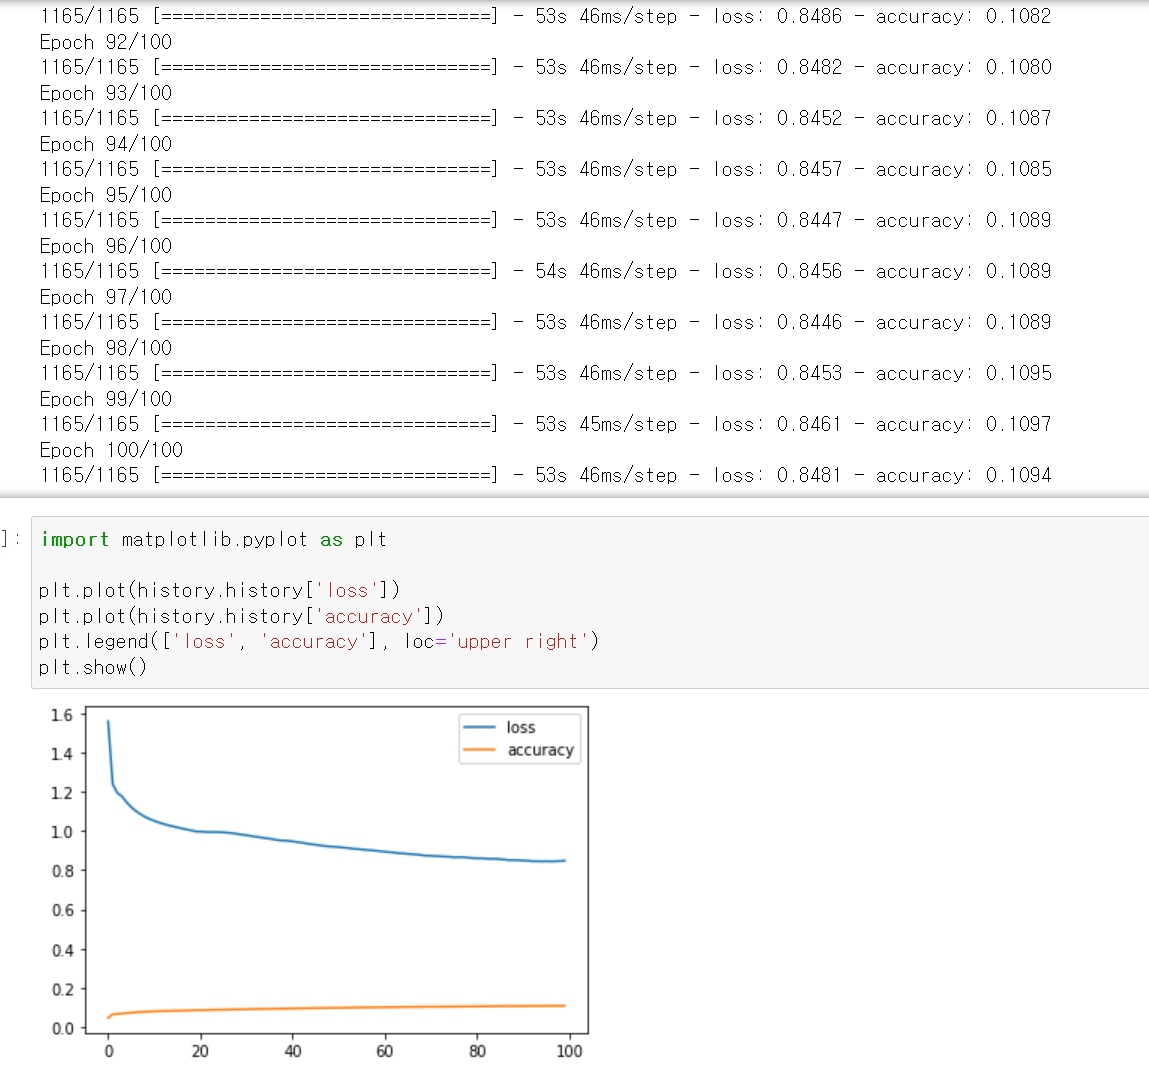

약 1시간 30분에 걸쳐 100epochs를 학습하면 챗봇은 무슨 대답을 해줄까요?

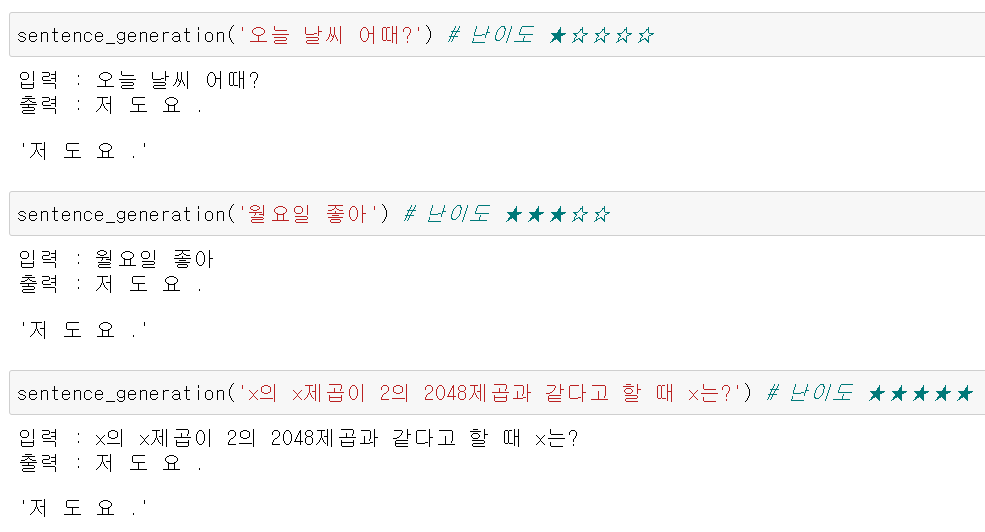

사실 오버피팅을 의도한 실험은 아니였지만 챗봇 모델에 오버피팅이 일어날 경우 출력 결과의 다양성을 잃어버린다는 것을 확인할 수 있습니다.

- - -
## 마무리하며

우수노드는 포기해야겠습니다..

이거 정말 고잉디퍼 가면 이해할 수 있는거죠?

해보고 싶은 게 있어도 레이어가 이해가 돼야 시도를 해보겠는데 이해해볼 엄두가 쉽사리 나질 않네요.

이전 대화를 기억하고 다음 대답에 참고하도록 해보고 싶기도 한데 평소랑 달리 이번엔 성공할거란 장담도 못하겠고,

무엇보다 괜히 도전했다간 제 방학이 사라질까봐 바로 포기해버렸습니다.

모델 설계는 거의 다 복붙에 데이터 전처리도 준비된 모듈을 불러오고 적용하니 끝나버렸네요.

그래도 결과를 보니 재미는 있었습니다. 하지만 NLP의 고질병으로 역시 성과가 잘 보이질 않는단 게 흠이네요.

새로운 전처리를 시도하고 파라미터를 튜닝해도 결과가 너무 주관적이라 모델이 좋아진건지 나빠진건지 알기가 힘듭니다.

loss와 accuracy도 수치가 좋아졌다고 해서 모델이 좋아졌다고 해석하기엔 무리가 있어보이구요.

애초에 데이터셋이 일상, 이별, 사랑 주제만 준비되어 있긴 했지만 말이죠.

    x의 x제곱 문제는 최근에 구본회 그루님께 드려본 문제입니다.(푸셨습니다)
    그래서 정답은 뭘까요?